# 분류 리뷰

In [ ]:
import pandas as pd
data = pd.read_csv("satimage.csv")
data.head()

- x1~x36 중 분산이 큰 변수의 y값별 평균 차이

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 분산분석 모델 적합
model = ols('x1 ~ C(y)', data=data).fit()
anova_results = anova_lm(model)

print(anova_results)

- 유의미한 차이인 경우 Tukey HSD Test

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey 사후검정
tukey = pairwise_tukeyhsd(endog=data['x1'],
                          groups=data['y'],
                          alpha=0.05)

print(tukey.summary())

- 데이터 전처리

- X, y, 파티셔닝

- 앙상블 적용: boosting vs bagging

- 하이퍼파라미터 서치

- 성능 평가

# SPC : Control Chart

##1. x-bar chart and R chart

In [41]:
#라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(42)

# 예제 데이터:정규분포
x = np.array([list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=17, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5))])

x

array([[10.99342831,  9.7234714 , 11.29537708, 13.04605971,  9.53169325],
       [ 9.53172609, 13.15842563, 11.53486946,  9.06105123, 11.08512009],
       [ 9.07316461,  9.06854049, 10.48392454,  6.17343951,  6.55016433],
       [ 8.87542494,  7.97433776, 10.62849467,  8.18395185,  7.1753926 ],
       [12.93129754,  9.5484474 , 10.13505641,  7.15050363,  8.91123455],
       [17.22184518, 14.69801285, 17.75139604, 15.79872262, 16.4166125 ],
       [ 8.79658678, 13.70455637,  9.97300555,  7.88457814, 11.64508982],
       [ 7.5583127 , 10.41772719,  6.08065975,  7.3436279 , 10.39372247],
       [11.47693316, 10.34273656,  9.76870344,  9.39779261,  7.04295602],
       [ 8.56031158,  9.07872246, 12.11424445, 10.68723658,  6.47391969]])

In [42]:
# 그룹 평균 저장 리스트
x_bar = []

# 그룹 Range 저장 리스트
r = []

# 계산 결과 저장
for group in x:
    x_bar.append(group.mean())
    r.append(group.max() - group.min())

x_bar

[np.float64(10.918005948650173),
 np.float64(10.874238498144853),
 np.float64(8.269846699204994),
 np.float64(8.56752036246535),
 np.float64(9.735307904953721),
 np.float64(16.377317836368462),
 np.float64(10.40076333227556),
 np.float64(8.358810003249861),
 np.float64(9.605824357136171),
 np.float64(9.382886952428057)]

[Text(0.5, 0, 'Group'), Text(0, 0.5, 'Range')]

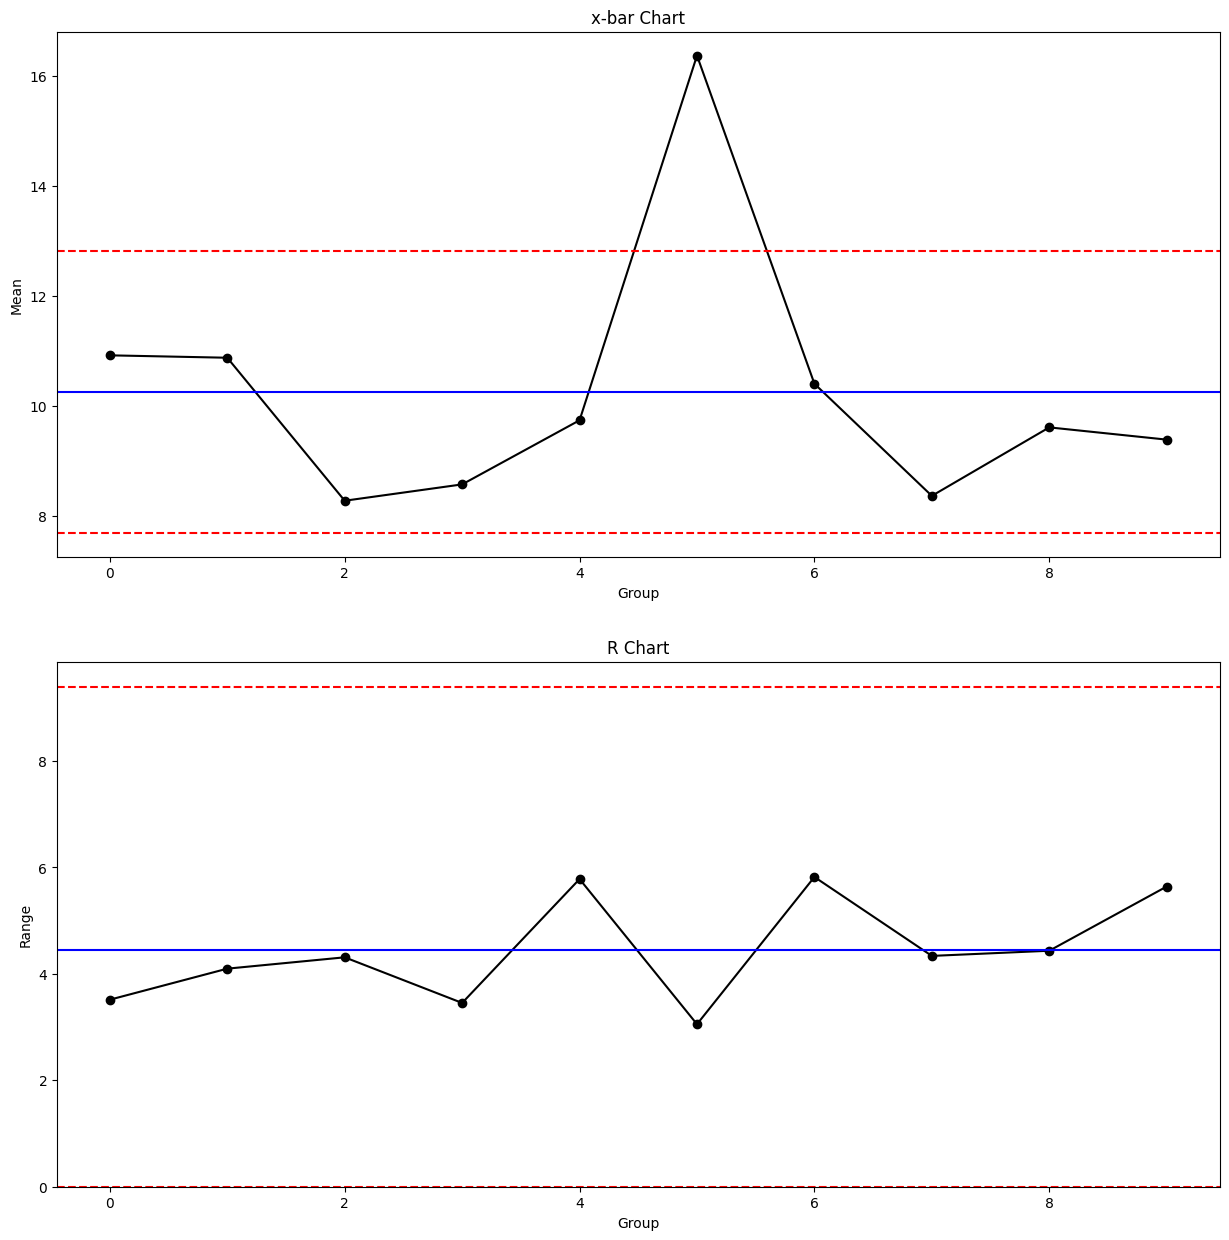

In [43]:
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart
axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((np.mean(x_bar)+0.577*np.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((np.mean(x_bar)-0.577*np.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((np.mean(x_bar)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# R chart
axs[1].plot(r, linestyle='-', marker='o', color='black')
axs[1].axhline((2.114*np.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((0*np.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((np.mean(r)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart')
axs[1].set(xlabel='Group', ylabel='Range')


In [44]:
# CL 넘는 점의 개수 찾기
i = 0
control = True

for group in x_bar:
    if group > np.mean(x_bar)+0.577*np.mean(r) or group < np.mean(x_bar)-0.577*np.mean(r):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1

if control == True:
    print('X bar chart: All points within control limits.')

# Validate points out of control limits for R chart
i = 0
control = True
for group in r:
    if group > 2.114*np.mean(r):
        print('Group', i, 'out of range cotrol limits!')
        control = False
    i += 1

if control == True:
    print('R chart: All points within control limits.')

Group 5 out of mean control limits!
R chart: All points within control limits.


##2. x-bar chart and s chart

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(42)

# Create dummy data
x = np.array([list(np.random.normal(loc=10, scale=2, size=11)),
        list(np.random.normal(loc=10, scale=2, size=11)),
        list(np.random.normal(loc=10, scale=2, size=11)),
        list(np.random.normal(loc=10, scale=2, size=11)),
        list(np.random.normal(loc=10, scale=2, size=11)),
        list(np.random.normal(loc=10, scale=2, size=11)),
        list(np.random.normal(loc=10, scale=2, size=11)),
        list(np.random.normal(loc=13, scale=2, size=11)),
        list(np.random.normal(loc=10, scale=2, size=11)),
        list(np.random.normal(loc=10, scale=2, size=11))])

# Define list variable for groups means
x_bar = []

# Define list variable for groups standard deviation
s = []

# Get and append groups means and standard deviations
for group in x:
    x_bar.append(group.mean())
    s.append(np.std(group))


[Text(0.5, 0, 'Group'), Text(0, 0.5, 'Range')]

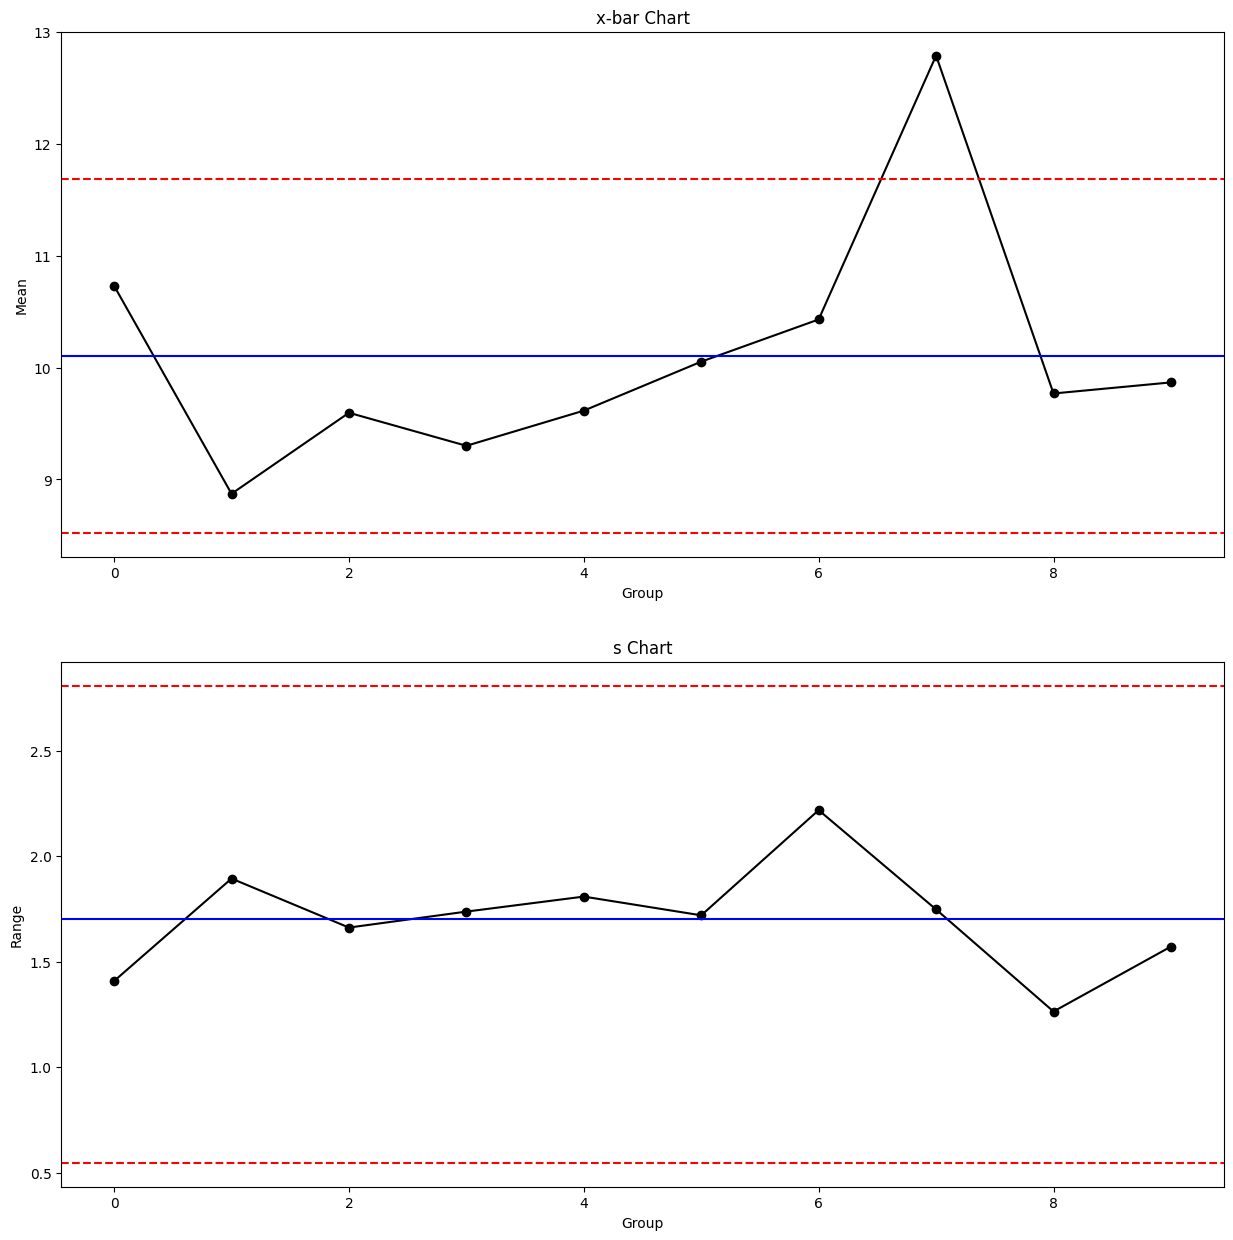

In [46]:
# Plot x-bar and s charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart
axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((np.mean(x_bar)+0.927*np.mean(s)), color='red', linestyle='dashed')
axs[0].axhline((np.mean(x_bar)-0.927*np.mean(s)), color='red', linestyle='dashed')
axs[0].axhline((np.mean(x_bar)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# s chart
axs[1].plot(s, linestyle='-', marker='o', color='black')
axs[1].axhline((1.649*np.mean(s)), color='red', linestyle='dashed')
axs[1].axhline((0.321*np.mean(s)), color='red', linestyle='dashed')
axs[1].axhline((np.mean(s)), color='blue')
axs[1].set_title('s Chart')
axs[1].set(xlabel='Group', ylabel='Range')



In [47]:
# Validate points out of control limits for x-bar chart
i = 0
control = True
for group in x_bar:
    if group > np.mean(x_bar)+0.927*np.mean(s) or group < np.mean(x_bar)-0.927*np.mean(s):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('X bar chart: All points within control limits.')



Group 7 out of mean control limits!


In [48]:
# Validate points out of control limits for s chart
i = 0
control = True
for group in s:
    if group > 1.649*np.mean(s) or group < 0.321*np.mean(s):
        print('Group', i, 'out of standard deviation cotrol limits!')
        control = False
    i += 1
if control == True:
    print('R chart: All points within control limits.')

R chart: All points within control limits.


##3. 제조 데이터

In [3]:
!unzip secom.zip

Archive:  secom.zip
  inflating: secom.data              
  inflating: secom.names             
  inflating: secom_labels.data       


In [15]:
import pandas as pd
X = pd.read_csv("secom.data", sep=" ", header=None)
y = pd.read_csv("secom_labels.data", sep=" ", header=None )

X.columns = ["X"+str(i) for i in range(X.shape[1])]
y.columns = ["target", "time"]
df = pd.concat([X, y], axis=1)
df.time = pd.to_datetime(df.time, dayfirst=True)
df.set_index("time", inplace=True)
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X581,X582,X583,X584,X585,X586,X587,X588,X589,target
time,,,,,,,,,,,,,,,,,,,,,
2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [16]:
from sklearn.model_selection import train_test_split
target_ohe = pd.get_dummies(df.target)
X_train, X_test, y_train, y_test = train_test_split(df.drop("target", axis=1), target_ohe, test_size=0.2, stratify=target_ohe, random_state=1)


In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X_train, y_train)


In [19]:
feature_importance = pd.Series( dt.feature_importances_)
feature_importance.index = X_train.columns
feature_importance.sort_values(ascending=False, inplace=True)

In [22]:
feature_importance.head()

,0
X480,0.068762
X413,0.058614
X477,0.050745
X304,0.043897
X120,0.041686


In [37]:
df = df.sort_index()  # 시간순 정렬

# 특정 시 간격 그룹화 후 X480에서 5개 샘플링
sampled = (
    df.groupby(pd.Grouper(freq='5D'))['X480']
    .apply(lambda x: x.sample(n=5, replace=True).reset_index(drop=True))
    .unstack()  # 행 → 열 변환
)

# 컬럼 이름 지정 (X480_1, X480_2, ...)
sampled.columns = [f"X480_{i+1}" for i in range(sampled.shape[1])]

In [49]:
sampled

,X480_1,X480_2,X480_3,X480_4,X480_5
time,,,,,
2008-07-19,149.4399,142.6991,140.1953,140.1953,149.4399
2008-07-24,15.7485,56.9462,79.1566,21.3647,56.9462
2008-07-29,21.0994,85.7740,79.4900,42.8291,64.9065
2008-08-03,79.3042,70.4399,87.5270,51.0405,90.6858
2008-08-08,63.0915,133.2224,55.9289,68.2715,68.2715
2008-08-13,110.1018,53.4641,90.8687,107.5097,51.4085
2008-08-18,90.7494,64.1575,36.7905,88.7839,48.1891
2008-08-23,50.6594,59.8710,155.3872,180.6847,91.1835
2008-08-28,76.7279,73.6672,54.6763,26.4207,77.6258


In [50]:
# Create dummy data
x = sampled.values

# Define list variable for groups means
x_bar = []

# Define list variable for groups standard deviation
s = []

# Get and append groups means and standard deviations
for group in x:
    x_bar.append(group.mean())
    s.append(np.std(group))


[Text(0.5, 0, 'Group'), Text(0, 0.5, 'Range')]

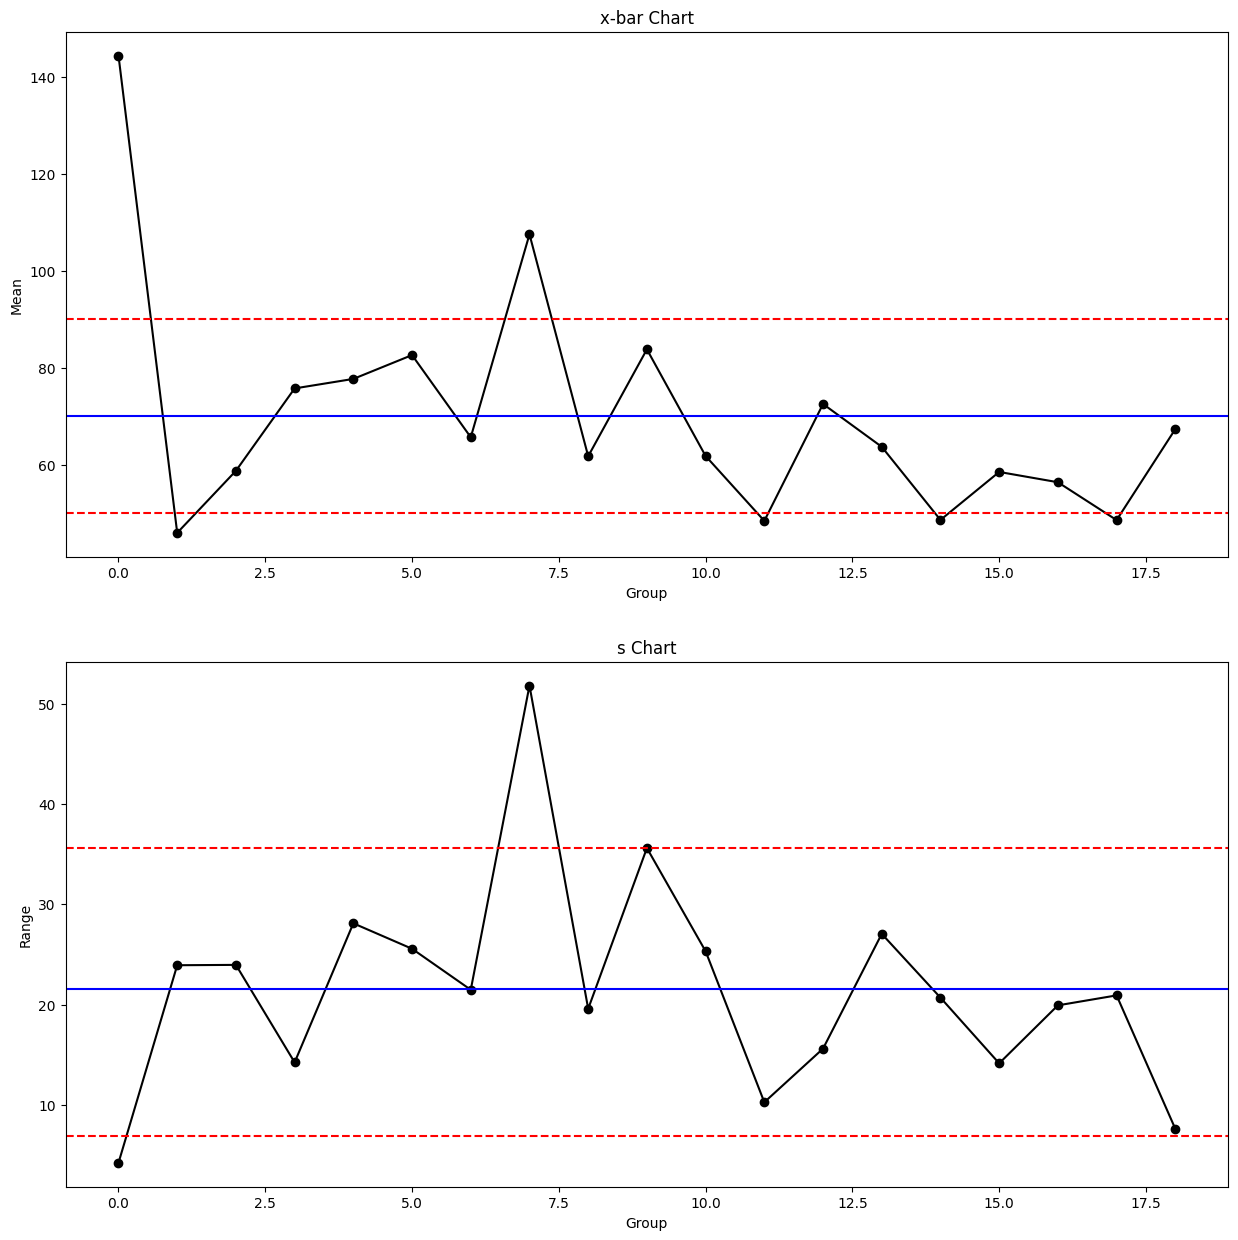

In [51]:
# Plot x-bar and s charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart
axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((np.mean(x_bar)+0.927*np.mean(s)), color='red', linestyle='dashed')
axs[0].axhline((np.mean(x_bar)-0.927*np.mean(s)), color='red', linestyle='dashed')
axs[0].axhline((np.mean(x_bar)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# s chart
axs[1].plot(s, linestyle='-', marker='o', color='black')
axs[1].axhline((1.649*np.mean(s)), color='red', linestyle='dashed')
axs[1].axhline((0.321*np.mean(s)), color='red', linestyle='dashed')
axs[1].axhline((np.mean(s)), color='blue')
axs[1].set_title('s Chart')
axs[1].set(xlabel='Group', ylabel='Range')



In [52]:
# Validate points out of control limits for x-bar chart
i = 0
control = True
for group in x_bar:
    if group > np.mean(x_bar)+0.927*np.mean(s) or group < np.mean(x_bar)-0.927*np.mean(s):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('X bar chart: All points within control limits.')



Group 0 out of mean control limits!
Group 1 out of mean control limits!
Group 7 out of mean control limits!
Group 11 out of mean control limits!
Group 14 out of mean control limits!
Group 17 out of mean control limits!


In [53]:
# Validate points out of control limits for s chart
i = 0
control = True
for group in s:
    if group > 1.649*np.mean(s) or group < 0.321*np.mean(s):
        print('Group', i, 'out of standard deviation cotrol limits!')
        control = False
    i += 1
if control == True:
    print('R chart: All points within control limits.')

Group 0 out of standard deviation cotrol limits!
Group 7 out of standard deviation cotrol limits!
Group 9 out of standard deviation cotrol limits!
